## Реалізація дерева

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self, root):
        self.root = Node(root)

    def insert(self, value):
        if self.root is None:
            self.root = Node(value)
        else:
            self._insert(value, self.root)

    def find_shortest_path_to_leaf(self, current_node):
        buff = [current_node]
        while True:
            new_buff = []
            for child in buff:
                if child.left is None or child.right is None:
                    return child
                else:
                    new_buff.append(child.left)
                    new_buff.append(child.right)
            buff = new_buff

    def _insert(self, value, current_node):
        if current_node.left is None:
            current_node.left = Node(value)
        elif current_node.right is None:
            current_node.right = Node(value)
        else:
            self._insert(value, self.find_shortest_path_to_leaf(current_node))

## Тестові данні

In [9]:
tree = BinaryTree(33)
tree.insert(4)
tree.insert(6)
tree.insert(8)
tree.insert(9)
tree.insert(10)
tree.insert(11)
tree.insert(12)
tree.insert(13)
tree.insert(14)
tree.insert(50)
tree.insert(2)
tree.insert(3)
tree.insert(31)
tree.insert(23)

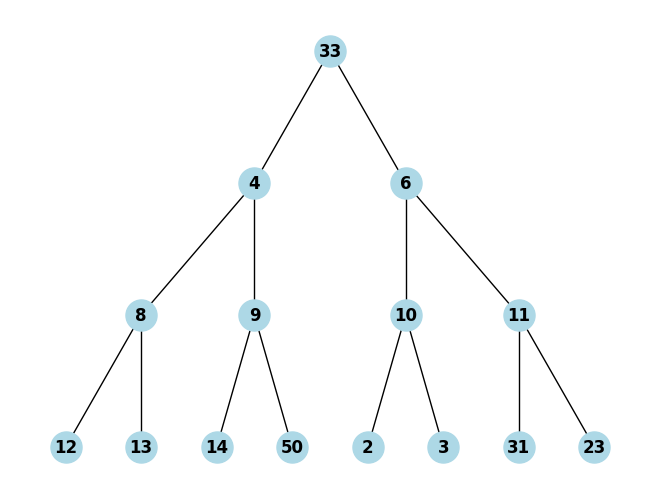

In [27]:
def visualize_tree(tree):
    G = nx.Graph()
    add_nodes(tree.root, G)
    add_edges(tree.root, G)
    
    pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_weight='bold')
    plt.show()

def add_nodes(node, G):
    if node is not None:
        G.add_node(node.value)
        add_nodes(node.left, G)
        add_nodes(node.right, G)

def add_edges(node, G):
    if node is not None:
        if node.left is not None:
            G.add_edge(node.value, node.left.value)
            add_edges(node.left, G)
        if node.right is not None:
            G.add_edge(node.value, node.right.value)
            add_edges(node.right, G)

visualize_tree(tree)

## Завдання 1/2


Напишіть алгоритм (функцію), який знаходить найбільше значення у двійковому дереві пошуку або в AVL-дереві.

Напишіть алгоритм (функцію), який знаходить найменше значення у двійковому дереві пошуку або в AVL-дереві. 


In [24]:
def find_ext_value(node, fn):
    if node is None:
        return None
    else:
        left_ext = find_ext_value(node.left, fn)
        right_ext = find_ext_value(node.right, fn)
        if left_ext is None and right_ext is None:
            return node.value
        elif left_ext is None:
            return fn(node.value, right_ext)
        elif right_ext is None:
            return fn(node.value, left_ext)
        else:
            return fn(node.value, left_ext, right_ext)

minimum_value = find_ext_value(tree.root, min)
print(f"Мінімальне значення: {minimum_value}")
maximum_value = find_ext_value(tree.root, max)
print(f"Максимальне значення: {maximum_value}")

Мінімальне значення: 2
Максимальне значення: 50


## Завдання 3

Напишіть алгоритм (функцію), який знаходить суму всіх значень у двійковому дереві пошуку або в AVL-дереві.

In [29]:
def find_sum_of_values(node):
    if node is None:
        return 0
    else:
        left_sum = find_sum_of_values(node.left)
        right_sum = find_sum_of_values(node.right)
        return node.value + left_sum + right_sum

sum_of_values = find_sum_of_values(tree.root)
print(f"Сума: {sum_of_values}")

Сума: 229
